In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [3]:
#Show dataset
df_clustering.head()

,latitude,longitude,avg_age_participants,males_ratio,state_congressional_district,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,39.8322,-86.2492,19.0,1.0,indiana_7,12.3,0.0,1.0,0.0,0.547323,233.7,0.009434,0.0,0.031250,0.000000
1,41.6645,-78.7856,62.0,1.0,pennsylvania_5,10.5,1.0,0.0,0.0,0.671644,651.0,0.100000,0.5,0.000000,0.000000
2,42.4190,-83.0393,24.0,1.0,michigan_14,11.0,0.0,0.5,0.5,0.785066,264.0,0.032787,0.0,0.041667,0.047619
3,38.9647,-94.4654,29.0,1.0,missouri_5,11.9,0.0,0.0,0.0,0.588294,345.1,0.014286,0.0,0.000000,0.000000
4,34.3904,-117.3770,19.0,1.0,california_8,11.0,1.0,0.0,0.0,0.599672,209.0,0.047619,0.2,0.000000,0.000000


In [4]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98321 entries, 0 to 98320
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      98321 non-null  float64
 1   longitude                     98321 non-null  float64
 2   avg_age_participants          98321 non-null  float64
 3   males_ratio                   98321 non-null  float64
 4   state_congressional_district  98321 non-null  object 
 5   povertyPercentage             98321 non-null  float64
 6   killed_ratio                  98321 non-null  float64
 7   injured_ratio                 98321 non-null  float64
 8   unharmed_ratio                98321 non-null  float64
 9   candidate_winning_ratio       98321 non-null  float64
 10  age_poverty_product           98321 non-null  float64
 11  males_in_month_ratio          98321 non-null  float64
 12  killed_in_month_ratio         98321 non-null  float64
 13  i

## K-Means Clustering

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [6]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage', 
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio', 
            'age_poverty_product', 'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio', 
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

14


In [7]:
# Extract features from the dataset
X = df_clustering[features]

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [10]:
min_max_scaler = MinMaxScaler()
X_normalized_minmax = min_max_scaler.fit_transform(X)

In [11]:
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [12]:
X_normalized_minmax = pd.DataFrame(X_normalized_minmax, columns=X.columns)

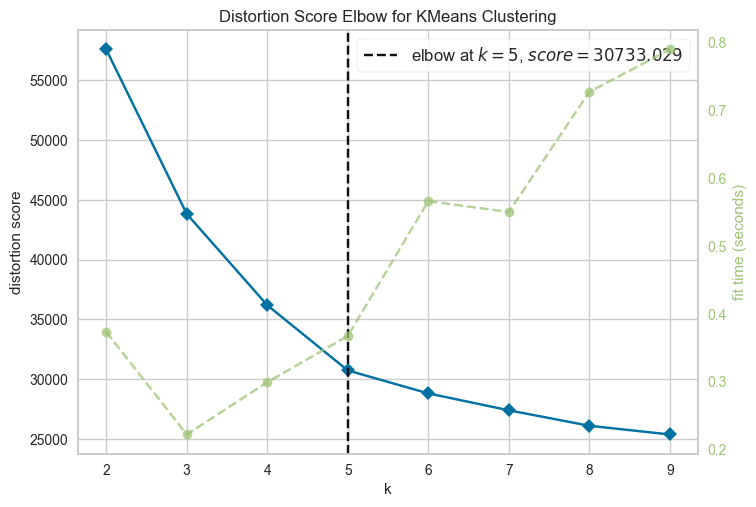

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized_minmax)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
X_normalized.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,0.465291,0.302253,-1.088989,0.598883,-0.032174,-0.523459,1.603257,-0.347054,-1.178584,-0.914937,-0.592849,-0.405602,0.056744,-0.272547
1,0.842689,0.860630,2.833162,0.598883,-0.712246,2.397305,-0.739698,-0.347054,-0.170840,1.622735,2.149943,6.271730,-0.474442,-0.272547
2,0.998093,0.542396,-0.632925,0.598883,-0.523337,-0.523459,0.431779,2.788069,0.748548,-0.730677,0.114394,-0.405602,0.233806,0.508101
3,0.286613,-0.312428,-0.176861,0.598883,-0.183301,-0.523459,-0.739698,-0.347054,-0.846476,-0.237495,-0.445913,-0.405602,-0.474442,-0.272547
4,-0.655554,-2.026522,-1.088989,0.598883,-0.523337,2.397305,-0.739698,-0.347054,-0.754243,-1.065141,0.563586,2.265331,-0.474442,-0.272547


In [16]:
X_normalized_minmax.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,0.450468,0.718930,0.225806,1.0,0.403101,0.0,1.0,0.00,0.375620,0.131299,0.044811,0.0,0.078125,0.000000
1,0.504484,0.829490,0.919355,1.0,0.263566,1.0,0.0,0.00,0.547097,0.475464,0.475000,1.0,0.000000,0.000000
2,0.526726,0.766479,0.306452,1.0,0.302326,0.0,0.5,0.75,0.703540,0.156289,0.155738,0.0,0.104167,0.095238
3,0.424894,0.597221,0.387097,1.0,0.372093,0.0,0.0,0.00,0.432132,0.223175,0.067857,0.0,0.000000,0.000000
4,0.290045,0.257825,0.225806,1.0,0.302326,1.0,0.0,0.00,0.447826,0.110928,0.226190,0.4,0.000000,0.000000


c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

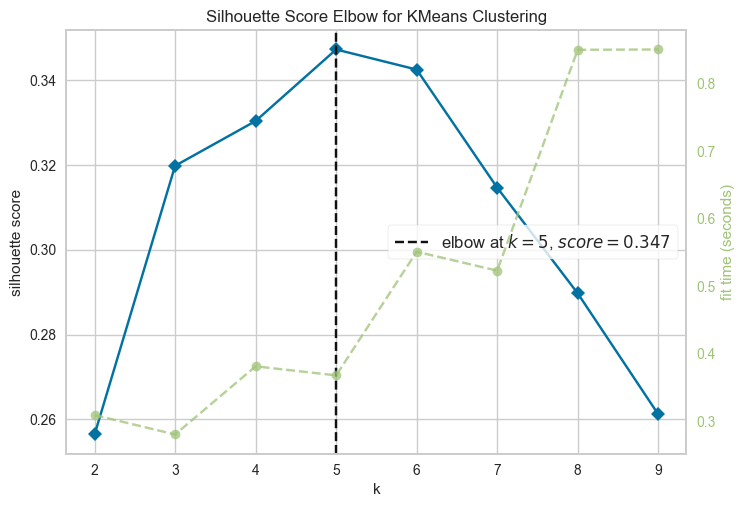

In [19]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized_minmax)
visualizer.show()
plt.show()

In [18]:
# print(kmeans.labels_)